In [ ]:
#Installing and importing libraries
!pip install matplotlib
!pip install numpy
!pip install scipy
!pip install sklearn
!pip install h5py pyyaml
!pip install tf_nightly
!pip install tensorboardcolab

import matplotlib.pyplot as plt
import numpy as np
import PIL
from imageio import imsave
from PIL import Image
from statistics import stdev 
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorboardcolab import TensorBoardColab, TensorBoardColabCallback


     |████████████████████████████████| 485.8 MB 23 kB/s 
     |████████████████████████████████| 1.4 MB 55.8 MB/s 
     |████████████████████████████████| 5.8 MB 14.0 MB/s 
     |████████████████████████████████| 462 kB 86.9 MB/s 
  Created wheel for tensorboardcolab: filename=tensorboardcolab-0.0.22-py3-none-any.whl size=3857 sha256=9d581ea8c2ecac4661850c23c8871ed5be86abc0f1911a948a8b0c0c71c3f836
  Stored in directory: /root/.cache/pip/wheels/69/4e/4a/1c6c267395cb10edded1050df12af165d3254cfce324e80941
Successfully built tensorboardcolab


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Split data into training (80%), validation (10%) and test (10%) set**

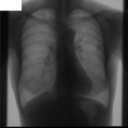

In [ ]:
im = Image.open("/content/drive/MyDrive/3차플젝drive/__Semantic_segmentation/TEST_FOLDER/Converted_Images_PNG/JPCLN021.PNG")
im

In [ ]:
im = np.reshape(np.array(im),(128,128,1))
im.shape

(128, 128, 1)

In [ ]:
mask = Image.open("/content/drive/MyDrive/3차플젝drive/__Semantic_segmentation/TEST_FOLDER/Merged_Masks_PNG/JPCLN021.PNG")
# mask = to_categorical(np.array(mask))
np.array(mask).shape

(128, 128)

In [ ]:
import os


img_length = len(os.listdir('/content/drive/MyDrive/3차플젝drive/__Semantic_segmentation/TEST_FOLDER/Converted_Images_PNG/'))
img_length

225

In [ ]:
#Splitting the data randomly 
from sklearn.model_selection import train_test_split


#Splitting of the data

X = np.ndarray((154,128,128,1))
Y = np.ndarray((154,128,128,4))

for i in range (21,154):
    if i <10:
        im = Image.open("/content/drive/MyDrive/3차플젝drive/__Semantic_segmentation/TEST_FOLDER/Converted_Images_PNG/JPCLN00%s.PNG" % (i))
        mask = Image.open("/content/drive/MyDrive/3차플젝drive/__Semantic_segmentation/TEST_FOLDER/Merged_Masks_PNG/JPCLN00%s.PNG" % (i))
        im = np.reshape(np.array(im),(128,128,1))
        mask = to_categorical(np.array(mask))
        X[i][:][:][:] = im
        Y[i][:][:][:] = mask

    elif (i>=10) and (i<100):
        im = Image.open("/content/drive/MyDrive/3차플젝drive/__Semantic_segmentation/TEST_FOLDER/Converted_Images_PNG/JPCLN0%s.PNG" % (i))
        mask = Image.open("/content/drive/MyDrive/3차플젝drive/__Semantic_segmentation/TEST_FOLDER/Merged_Masks_PNG/JPCLN0%s.PNG" % (i))
        im = np.reshape(np.array(im),(128,128,1))
        mask = to_categorical(np.array(mask))
        X[i][:][:][:] = im
        Y[i][:][:][:] = mask

    elif (i>=100):
        if (i == 122):
            continue;
        im = Image.open("/content/drive/MyDrive/3차플젝drive/__Semantic_segmentation/TEST_FOLDER/Converted_Images_PNG/JPCLN%s.PNG" % (i))
        mask = Image.open("/content/drive/MyDrive/3차플젝drive/__Semantic_segmentation/TEST_FOLDER/Merged_Masks_PNG/JPCLN%s.PNG" % (i))
        im = np.reshape(np.array(im),(128,128,1))
        mask = to_categorical(np.array(mask))
        X[i][:][:][:] = im
        Y[i][:][:][:] = mask


for i in range(21,94):   
    if i <10:
        im = Image.open("/content/drive/MyDrive/3차플젝drive/__Semantic_segmentation/TEST_FOLDER/Converted_Images_PNG/JPCNN00%s.PNG" % (i))
        mask = Image.open("/content/drive/MyDrive/3차플젝drive/__Semantic_segmentation/TEST_FOLDER/Merged_Masks_PNG/JPCNN00%s.PNG" % (i))
        im = np.reshape(np.array(im),(128,128,1))
        mask = to_categorical(np.array(mask))
        X[i][:][:][:] = im
        Y[i][:][:][:] = mask

    elif (i>=10):
        im = Image.open("/content/drive/MyDrive/3차플젝drive/__Semantic_segmentation/TEST_FOLDER/Converted_Images_PNG/JPCNN0%s.PNG" % (i))
        mask = Image.open("/content/drive/MyDrive/3차플젝drive/__Semantic_segmentation/TEST_FOLDER/Merged_Masks_PNG/JPCNN0%s.PNG" % (i))
        im = np.reshape(np.array(im),(128,128,1))
        mask = to_categorical(np.array(mask))
        if i<47:
            X[i][:][:][:] = im
            Y[i][:][:][:] = mask
        elif 46<i<72:
            X[i-47][:][:][:] = im
            Y[i-47][:][:][:] = mask
        elif 71<i<94:
            X[i-72][:][:][:] = im
            Y[i-72][:][:][:] = mask

    
#Splitting of data into training, validation and testing
Xtr, Xtst, Ytr, Ytst = train_test_split(X, Y, test_size=0.10)
Xtr, Xva, Ytr, Yva = train_test_split(Xtr, Ytr, test_size=0.10)


#Printing shape of Training and Test data
print( Xtr.shape, Ytr.shape)
print( Xtst.shape, Ytst.shape)
print(Xva.shape, Yva.shape)

(124, 128, 128, 1) (124, 128, 128, 4)
(16, 128, 128, 1) (16, 128, 128, 4)
(14, 128, 128, 1) (14, 128, 128, 4)


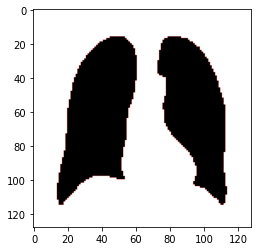

In [ ]:
plt.imshow(Ytr[0])

**Creating the model**

In [ ]:
#Build the model

#Libraries
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Activation, Conv2D, Dropout,MaxPooling2D,UpSampling2D, Input, ELU, Concatenate, BatchNormalization
from tensorflow.keras.models import load_model
# from tensorflow.keras.losses import categorical_crossentropy



In [ ]:
# Model code

first_input = Input(shape =(128,128,1))
bn = BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001)(first_input)
conv1_1 = Conv2D(128, [3,3], strides=(1, 1), activation='elu', padding="same")(bn)
conv1_2=Conv2D(128, [3,3], strides=(1, 1), activation='elu', padding="same")(conv1_1)
dropout1 = Dropout(0.1)(conv1_2)
maxPool1 = MaxPooling2D(pool_size=2, strides=1)(dropout1)
conv2_1 = Conv2D(64, [3,3], strides=(2, 2), activation='elu', padding="same")(maxPool1)
conv2_2 = Conv2D(64, [3,3], strides=(1, 1), activation='elu', padding="same")(conv2_1)
dropout2 = Dropout(0.1)(conv2_2)
maxPool2 = MaxPooling2D(pool_size=2, strides=1)(dropout2)
conv3_1 = Conv2D(32, [3,3], strides=(2, 2), activation='elu', padding="same")(maxPool2)
conv3_2 = Conv2D(32, [3,3], strides=(1, 1), activation='elu', padding="same")(conv3_1)
dropout3 = Dropout(0.1)(conv3_2)
maxPool3 = MaxPooling2D(pool_size=2, strides=1)(dropout3)

conv4_1 = Conv2D(16, [3,3], strides=(2, 2), activation='elu', padding="same")(maxPool3)
conv4_2 = Conv2D(16, [3,3], strides=(1, 1), activation='elu', padding="same")(conv4_1)
dropout4 = Dropout(0.1)(conv4_2)

upSampling1 = UpSampling2D(size=(2, 2))(dropout4)

#concatenate
conv_int5 = Conv2D(32, [3,3], strides=(1, 1), activation='elu', padding="same")(upSampling1)
concat1 = Concatenate()([dropout3, conv_int5])

conv5_1 = Conv2D(32, [3,3], strides=(1, 1), activation='elu', padding="same")(concat1)
conv5_2 = Conv2D(32, [3,3], strides=(1, 1), activation='elu', padding="same")(conv5_1)
dropout5 = Dropout(0.1)(conv5_2)
upSampling2 = UpSampling2D(size=(2, 2))(dropout5)
#concatenate
conv_int6 = Conv2D(64, [3,3], strides=(1, 1), activation='elu', padding="same")(upSampling2)
concat2 = Concatenate()([dropout2, conv_int6])

conv6_1 = Conv2D(64, [3,3], strides=(1, 1), activation='elu', padding="same")(concat2)
conv6_2 = Conv2D(64, [3,3], strides=(1, 1), activation='elu', padding="same")(conv6_1)
dropout6 = Dropout(0.1)(conv6_2)
upSampling3 = UpSampling2D(size=(2, 2))(dropout6)

#concatenate
conv_int7 = Conv2D(128, [3,3], strides=(1, 1), activation='elu', padding="same")(upSampling3)
concat3 = Concatenate()([dropout1, conv_int7])

conv7_1 = Conv2D(128, [3,3], strides=(1, 1), activation='elu', padding="same")(concat3)
conv7_2 = Conv2D(128, [3,3], strides=(1, 1), activation='elu', padding="same")(conv7_1)

dropout7 = Dropout(0.1)(conv7_2)

#batch normalization
bn = BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001)(dropout7)

# output = Conv2D(4, [1,1], strides=(1, 1), activation='softmax', padding="same")(bn)
output2 = Conv2D(4, [1,1], strides=(1, 1), activation='softmax', padding="same")(bn)



In [ ]:
# #Custom loss function combining categorical cross entropy and dice coefficient 
# from keras import backend as K

# def loss_tot(y_true, y_pred, smooth=1):
   
#     intersection = K.sum(K.abs(y_true * y_pred), axis=-1)
#     dice = (2. * intersection + smooth) / (K.sum(K.square(y_true),-1) + K.sum(K.square(y_pred),-1) + smooth)
    
#     return 1-dice+categorical_crossentropy(y_true, y_pred)                    


In [ ]:
#Importing an existing model or compiling a newly defined one

#Define the optimizer
from tensorflow.keras.optimizers import Adam

#Parameters for loading an existing model
model_name = 'inversenet.h5'
load_existant = False

if load_existant:
    model = load_model(model_name) 

else:

    model = Model(inputs=first_input, outputs=output2)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
    model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 1  0           []                               
                                )]                                                                
                                                                                                  
 batch_normalization (BatchNorm  (None, 128, 128, 1)  4          ['input_1[0][0]']                
 alization)                                                                                       
                                                                                                  
 conv2d (Conv2D)                (None, 128, 128, 12  1280        ['batch_normalization[0][0]']    
                                8)                                                          

In [ ]:
import tensorflow as tf

checkpointer = tf.keras.callbacks.ModelCheckpoint('model_for_test.h5', verbose=1, save_best_only = True)

callbacks = [
             tf.keras.callbacks.EarlyStopping(patience=2, monitor='accuracy'),
             tf.keras.callbacks.TensorBoard(log_dir='logs')
]

results = model.fit(Xtr,Ytr, validation_split=0.1, batch_size=32, epochs=30, callbacks=callbacks)

Epoch 1/30
4/4 [==============================] - 22s 5s/step - loss: 0.8974 - acc: 0.4300 - val_loss: 0.7039 - val_acc: 0.3302
Epoch 2/30
4/4 [==============================] - 20s 5s/step - loss: 0.6233 - acc: 0.6767 - val_loss: 1.2563 - val_acc: 0.4879
Epoch 3/30
4/4 [==============================] - 20s 5s/step - loss: 0.5791 - acc: 0.7701 - val_loss: 2.8755 - val_acc: 0.3443
Epoch 4/30
4/4 [==============================] - 20s 5s/step - loss: 0.5480 - acc: 0.7915 - val_loss: 3.4437 - val_acc: 0.5562
Epoch 5/30
4/4 [==============================] - 20s 5s/step - loss: 0.5202 - acc: 0.8384 - val_loss: 4.6689 - val_acc: 0.4924
Epoch 6/30
4/4 [==============================] - 20s 5s/step - loss: 0.4980 - acc: 0.8548 - val_loss: 1.9642 - val_acc: 0.5925
Epoch 7/30
4/4 [==============================] - 20s 5s/step - loss: 0.4810 - acc: 0.8694 - val_loss: 1.4951 - val_acc: 0.6091
Epoch 8/30
4/4 [==============================] - 20s 5s/step - loss: 0.4639 - acc: 0.8788 - val_loss: 2

In [ ]:
import tensorflow as tf

writer = tf.summary.create_file_writer("/tmp/mylogs/eager")

with writer.as_default():
  for step in range(100):
    # other model code would go here
    tf.summary.scalar("my_metric", 0.5, step=step)
    writer.flush()

In [ ]:
ls /tmp/mylogs/eager

events.out.tfevents.1638169147.a3836226955b.250.2.v2


**Trainin the model**

Data augmentation improvement

Early stopping improvement

In [ ]:
len(mask_generator)

7

Training

In [ ]:
# # Train the model, iterating on the data in batches
# history = model.fit_generator(train_generator, validation_data = (Xva, Yva), verbose = 1, steps_per_epoch=10, epochs=1000, callbacks=[early_stopping , check_point, TensorBoardColabCallback(tbc)], class_weight = 'auto') #steps_per_epoch = data_size/n_batch
# # history = model.fit_generator(Xtr, Ytr, validation_data = (Xva, Yva), verbose = 1, steps_per_epoch=10, epochs=1000, callbacks=None, class_weight = None) # Bang
# path_new_model = "/content/drive/MyDrive/3차플젝drive/DD2424-Semantic-Segmentation-For-XRay-Images-master/cloud1000epochs.h5"

# #Save final model
# model.save(path_new_model)


**Metrics**

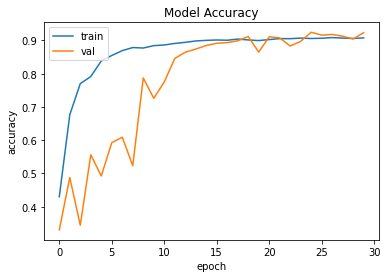

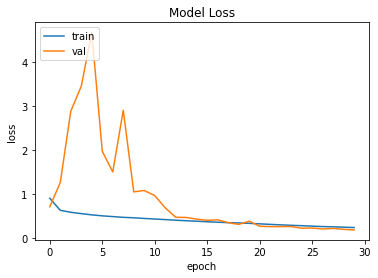

In [ ]:
# list all data in history
# print(history.history.keys())
# summarize history for accuracy
plt.plot(results.history['acc'])
plt.plot(results.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
# plt.savefig('gdrive/My Drive/Deep Learning Project/Results/Metrics/Model_Accuracy_1000.png')
plt.show()
# summarize history for loss
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
# plt.savefig('gdrive/My Drive/Deep Learning Project/Results/Metrics/Model_Loss_1000.png')
plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(Xtst, Ytst, verbose=0)
print('Test metrics: Loss {0} Accuracy: {1}'.format(test_loss,test_acc))

#Test predictions
prediction = model.predict(Xtst)


Test metrics: Loss 0.25703752040863037 Accuracy: 0.8854598999023438


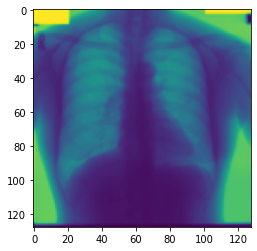

In [ ]:
plt.imshow(np.reshape(Xtst[0],(128,128)))

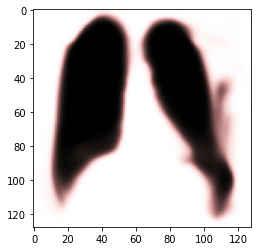

In [ ]:
plt.imshow(prediction[0])

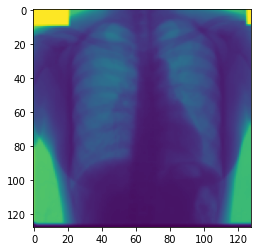

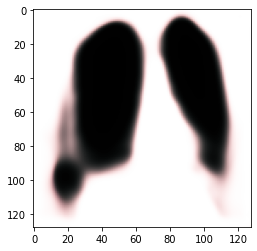

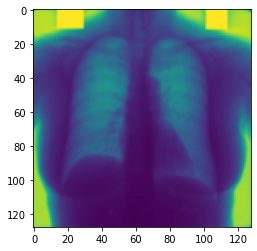

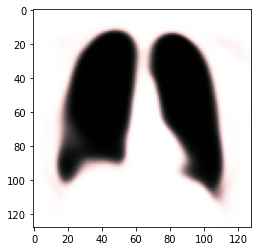

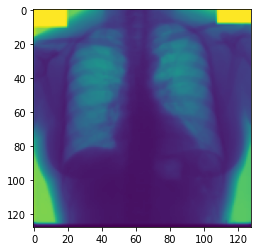

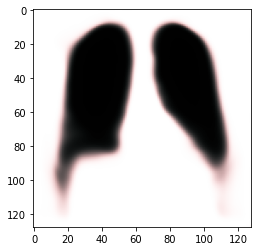

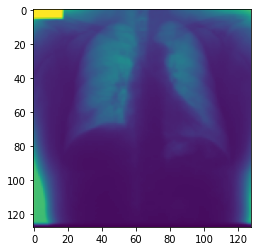

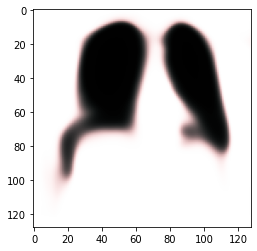

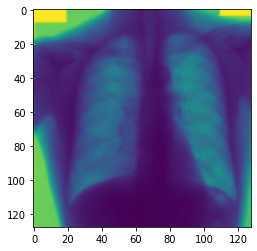

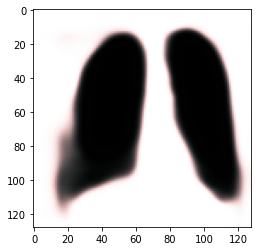

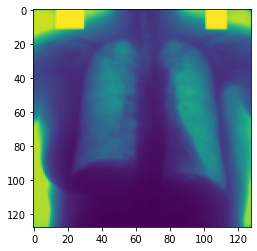

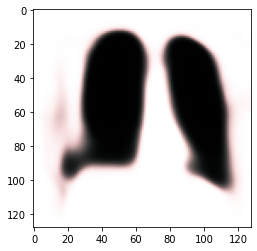

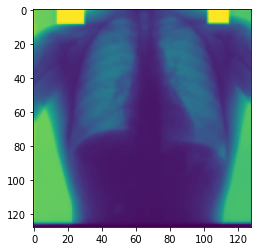

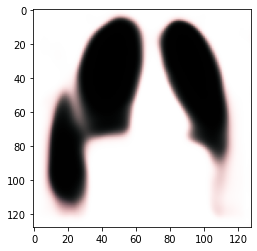

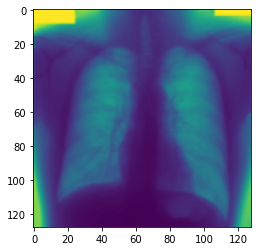

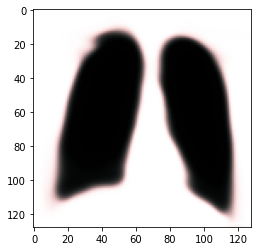

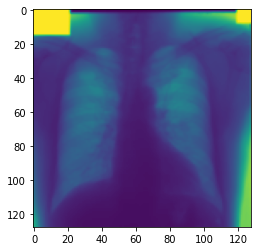

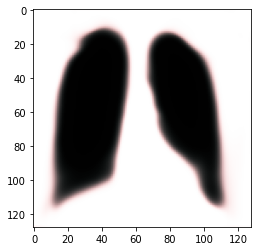

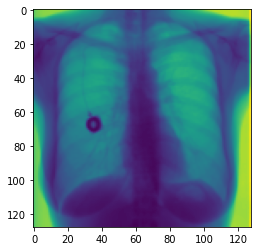

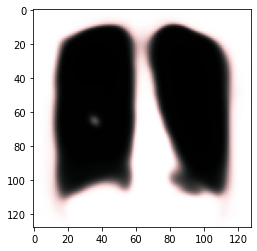

In [ ]:
for i in range(10):
    plt.imshow(np.reshape(Xtst[i],(128,128)))
    plt.show()
    plt.imshow(prediction[i])
    plt.show()

In [ ]:
org_im = Image.open("/content/drive/MyDrive/3차플젝drive/소아 데이터_샘플용/신생아호흡곤란증후군/org/H01_00483_01.jpg")
# rs_im = np.reshape(np.array(org_im),(,128,128,1))

In [ ]:
print(np.array(org_im).shape)

(2010, 1670, 3)


In [ ]:
# plt.imshow(im_)
rs_im = np.array(rs_im).reshape(1,128,128,-1)

In [ ]:
import cv2

org_im = cv2.imread("/content/drive/MyDrive/3차플젝drive/소아 데이터_샘플용/신생아호흡곤란증후군/org/H01_00483_01.jpg",0)
print(org_im.shape)
scaled_image = cv2.resize(org_im, (128, 128))  # when scaling we scale original image to 24x24 
print(scaled_image.shape)
scaled_image = scaled_image.reshape(1,128,128)

(2010, 1670)
(128, 128)


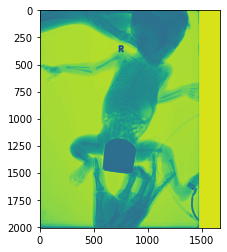

In [ ]:
plt.imshow(org_im)

In [ ]:
scaled_image[0].reshape(128,128,1)

In [ ]:
Xtst[0].shape

(128, 128, 1)

In [ ]:
test_pre = model.predict(scaled_image[0].reshape(128,128,1))
test_pre.shape

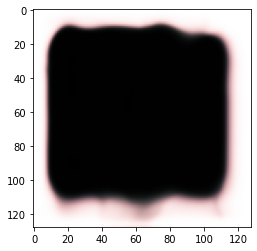

In [ ]:
plt.imshow(np.reshape(test_pre,(128,128,4)))

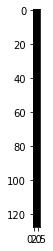

In [ ]:
#Build our own color map

#import important libraries
import matplotlib
from matplotlib.colors import LinearSegmentedColormap

#Define new colormap
colors = [(0, 0, 0),(1, 0, 0), (0, 0, 1), (1, 1, 0)]  # R -> G -> B
n_bins = [64, 64, 64, 64]  # Discretizes the interpolation into bins
cmap_name = 'custom_cmap'

# Create the colormap
cm = LinearSegmentedColormap.from_list(cmap_name, colors)

# Plot result
plt.imshow(np.argmax(Ytst[3][:][:][:],0), cmap=cm)



(128, 128)


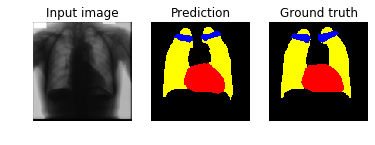

(128, 128)


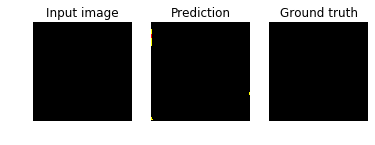

(128, 128)


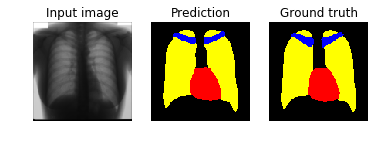

(128, 128)


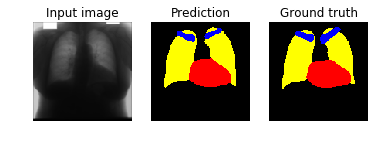

(128, 128)


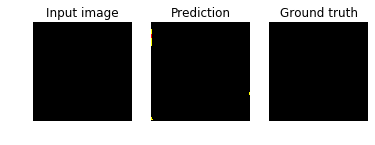

(128, 128)


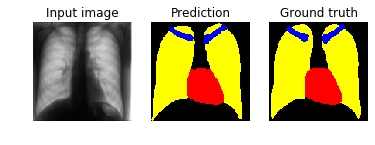

(128, 128)


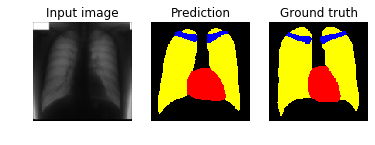

(128, 128)


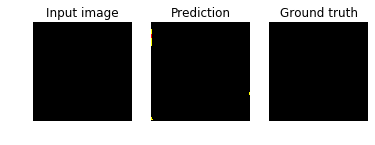

(128, 128)


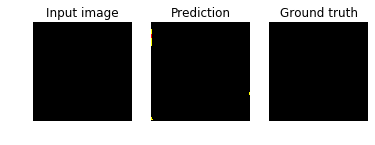

(128, 128)


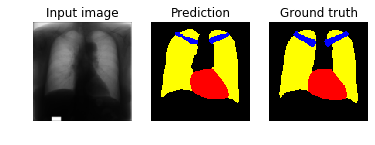

(128, 128)


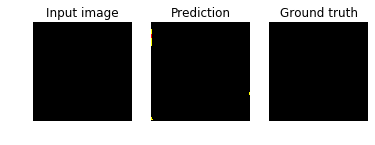

(128, 128)


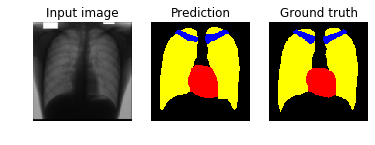

(128, 128)


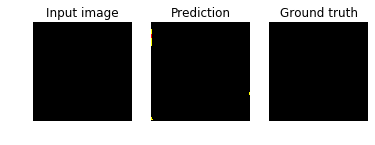

(128, 128)


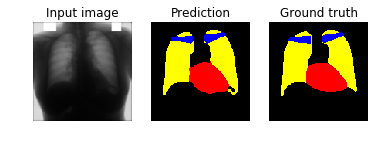

(128, 128)


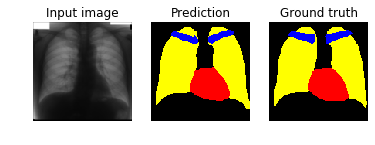

(128, 128)


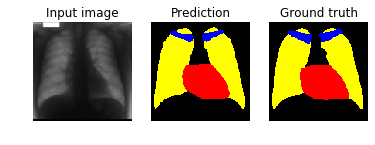

(128, 128)


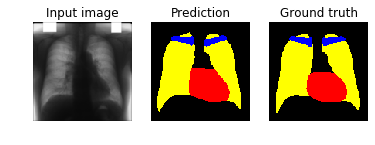

(128, 128)


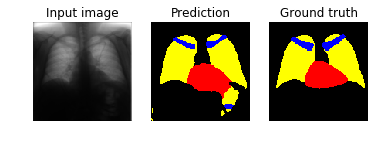

(128, 128)


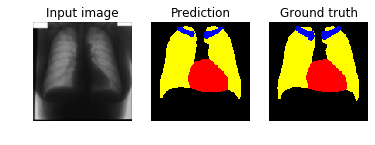

(128, 128)


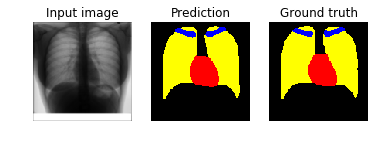

(128, 128)


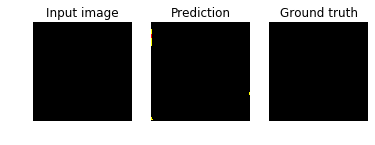

(128, 128)


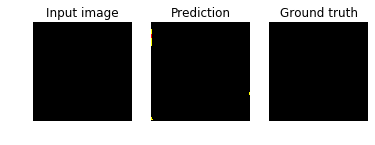

(128, 128)


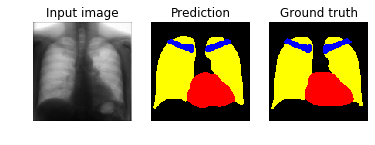

(128, 128)


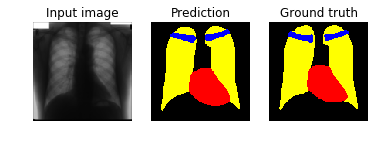

(128, 128)


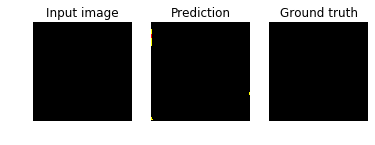

In [ ]:
#Print test predictions for evaluation
for i in range(len(prediction)):

    not_onehot_pred= np.argmax(prediction[i],2)
    print(not_onehot_pred.shape)
    
    #Plot
    fig = plt.figure("Result Comparison{0}".format(i))
    ax1 = fig.add_subplot(1,3,1)
    plt.title('Input image')
    plt.imshow(np.reshape(Xtst[i][:][:][:],(128,128)), cmap='gray')
    ax1.axis('off')
    ax1 = fig.add_subplot(1,3,2)
    plt.title('Prediction')
    plt.imshow(not_onehot_pred, cmap = cm)
    ax1.axis('off')
    ax1 = fig.add_subplot(1,3,3)
    plt.imshow(np.argmax(Ytst[i][:][:][:],2), cmap = cm)
    plt.title('Ground truth')
    plt.savefig('Prediction_1000epochs{0}.png'.format(i))
    ax1.axis('off')
    plt.show()


In [ ]:
# 자신의 폴더 경로에 맞게 재지정해주세요.
root_path = '~/archive/ityscapes_data/'

data_dir = root_path

# data_dir의 경로(문자열)와 train(문자열)을 결합해서 train_dir(train 폴더의 경로)에 저장합니다.
train_dir = os.path.join(data_dir, "train")

# data_dir의 경로(문자열)와 val(문자열)을 결합해서 val_dir(val 폴더의 경로)에 저장합니다.
val_dir = os.path.join(data_dir, "val")

# train_dir 경로에 있는 모든 파일을 리스트의 형태로 불러와서 train_fns에 저장합니다.
train_fns = os.listdir(train_dir)

# val_dir 경로에 있는 모든 파일을 리스트의 형태로 불러와서 val_fns에 저장합니다.
val_fns = os.listdir(val_dir)

print(len(train_fns), len(val_fns))